In [1]:
import sys
import numpy as np
sys.path.append(r'../')

import pandas as pd
import numpy as np
from numpy import *
from scipy.optimize import minimize

import matplotlib
import matplotlib.pyplot as plt

from spl_train import run_spl
import matplotlib.font_manager as font_manager

from sklearn.metrics import mean_squared_error


In [2]:
output_folder = 'results_spl/' ## directory to save discovered results
save_eqs = True                ## if true, discovered equations are saved to "output_folder" dir

font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=36)

In [3]:
balldrop_exp = ['Baseball',
                'Blue Basketball',
                'Green Basketball',
                'Volleyball',
                'Bowling Ball',
                'Golf Ball',
                'Tennis Ball',
                'Whiffle Ball 1',
                'Whiffle Ball 2',
                'Yellow Whiffle Ball',
                'Orange Whiffle Ball']

baseline_models = ['C+C*x+C*x**2+C*x**3', 
                   'C+C*x+C*exp(C*x)', 
                   'C+C*log(cosh(C*x))']

In [4]:
def solve_model(eq, data):
    x = data[0, :]
    f_true = data[1, :]
    c_count = eq.count('C')
    c_lst = ['c'+str(i) for i in range(c_count)]
    for c in c_lst: 
        eq = eq.replace('C', c, 1)

    def eq_test(c):
        x = data[0, :]
        for i in range(len(c)): 
            globals()['c'+str(i)] = c[i]
        return np.linalg.norm(eval(eq) - f_true, 2)
    
    x0 = [1.0] * len(c_lst)
    c_lst = minimize(eq_test, x0, method='Powell', tol=1e-6).x.tolist()
    c_lst = [np.round(x, 3) if abs(x) > 1e-2 else 0 for x in c_lst]
    eq_est = eq
    for i in range(len(c_lst)):
        eq_est = eq_est.replace('c'+str(i), str(c_lst[i]), 1)
    eq = eq_est.replace('+-', '-')
    y_pred = eval(eq)

    return eq


def pred_with_baseline_model(model, train_sample, test_sample):
    eq_model = solve_model(model, train_sample)
    print(eq_model)
    x = test_sample[0, :]
    f_pred = eval(eq_model)
    return f_pred

In [6]:
import importlib
import sys
importlib.reload(sys.modules['spl_train'])
from spl_train import run_spl

### run SRL and baseline models on all ball drop data

task :Baseball
47.682+1.456*x-5.629*x**2+0.376*x**3
45.089-8.156*x+5.448*exp(0*x)
48.051-183.467*log(cosh(0.217*x))

test 0
Episode 2000/2000, current best reward 0.9837600314800166.
1 tests complete after 3 iterations.
best solution: -4.5383*x**2 + 0.6253*x + 47.8042
test score: 0.7690071590973465

MSE of SRL prediction 0.3
MSE of Model-1 prediction 2.798
MSE of Model-2 prediction 94.589
MSE of Model-3 prediction 3.507


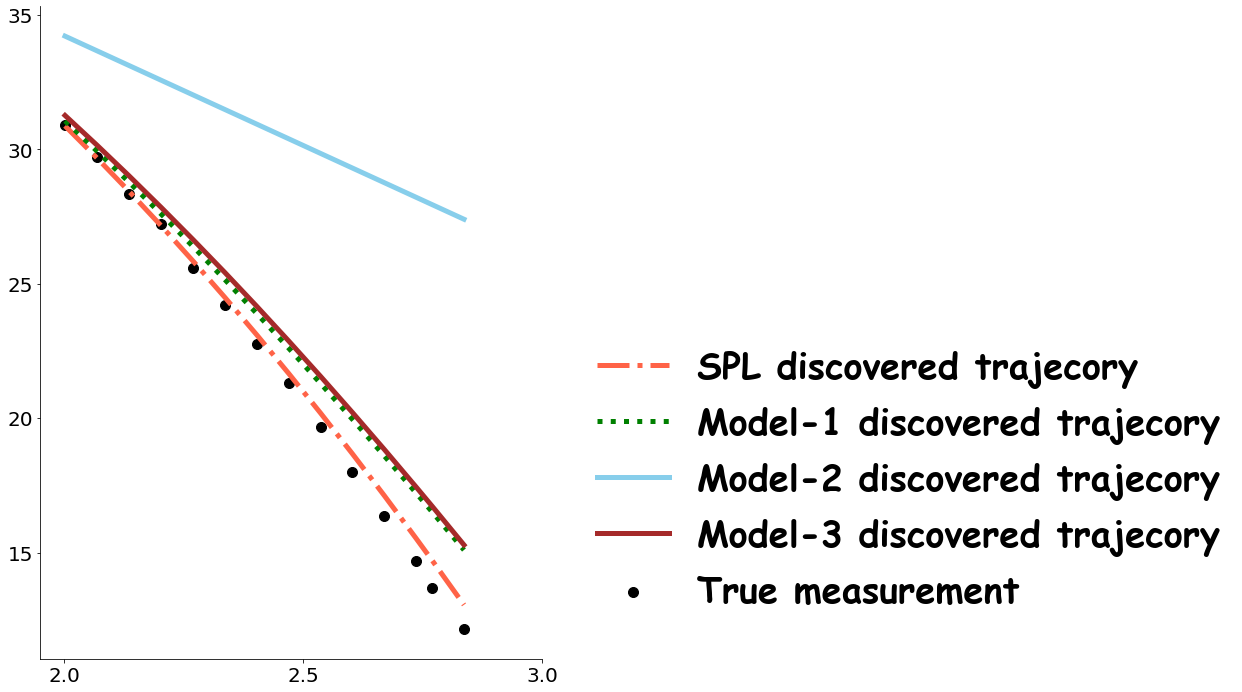

task :Blue Basketball
46.513-0.493*x-3.912*x**2+0.03*x**3
43.522-7.963*x+5.306*exp(0*x)
46.402-84.791*log(cosh(0.319*x))

test 0
Episode 2000/2000, current best reward 0.9903173999552322.
1 tests complete after 3 iterations.
best solution: -4.9081*x**2 + log(cosh(x**2)) + 46.52844847120932
test score: 0.6172441466149663

MSE of SRL prediction 0.62
MSE of Model-1 prediction 0.513
MSE of Model-2 prediction 79.209
MSE of Model-3 prediction 2.227


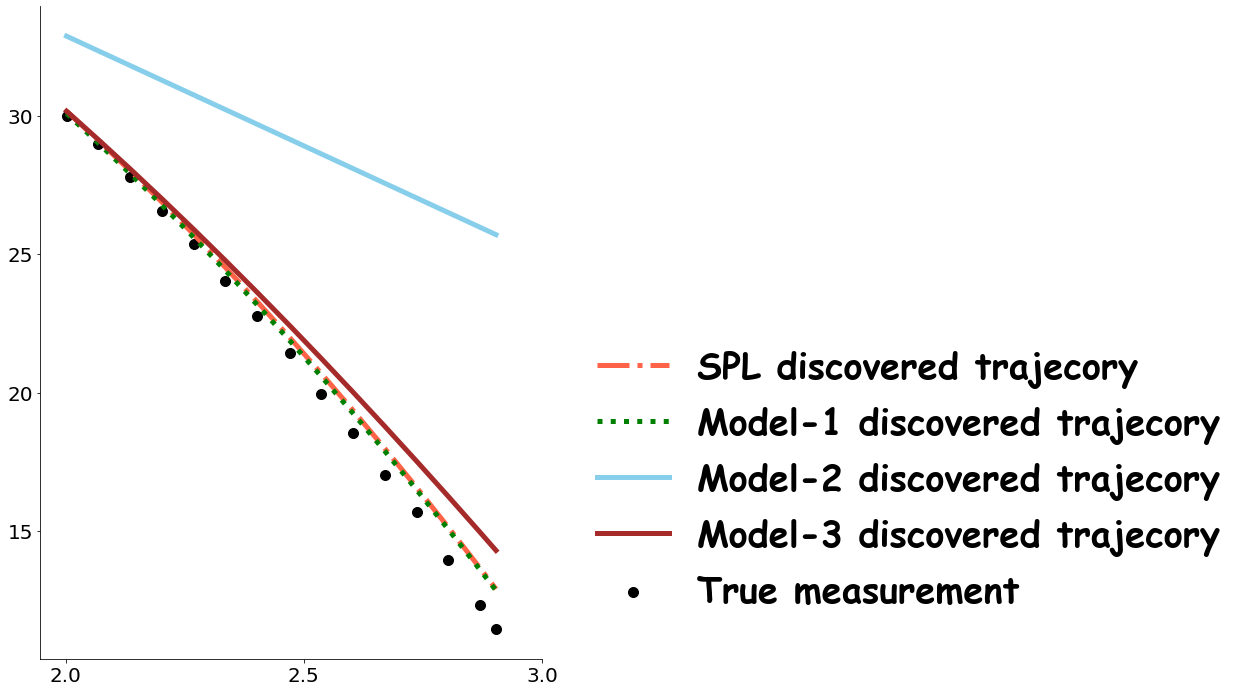

task :Green Basketball
46.438-0.34*x-3.882*x**2-0.055*x**3
43.512-8.043*x+5.346*exp(0*x)
46.391-124.424*log(cosh(0.263*x))

test 0
Episode 2000/2000, current best reward 0.9920551540484214.
1 tests complete after 3 iterations.
best solution: -4.1465*x**2 + log(cosh(1)) + 45.90866303725301
test score: 0.9192064407461755

MSE of SRL prediction 0.088
MSE of Model-1 prediction 0.1
MSE of Model-2 prediction 85.435
MSE of Model-3 prediction 1.604


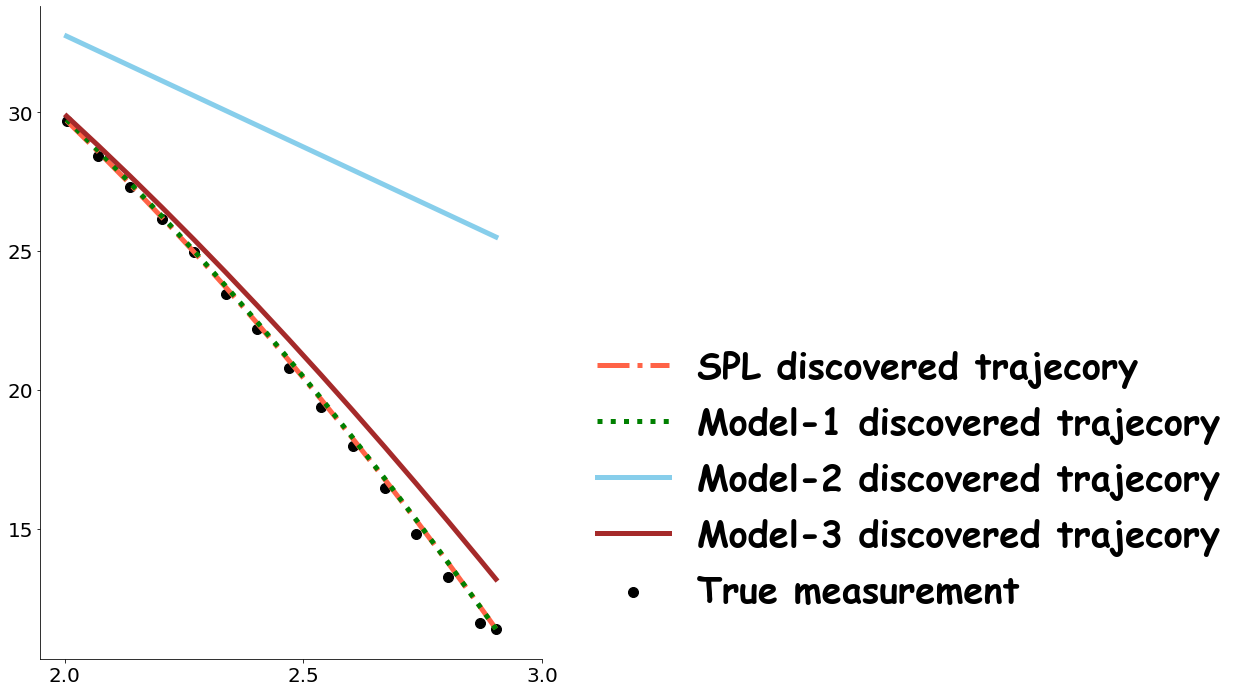

task :Volleyball
48.046+0.362*x-4.352*x**2+0.218*x**3
45.32-7.317*x+5.037*exp(0*x)
48.124-107.816*log(cosh(0.27*x))

test 0
Episode 2000/2000, current best reward 0.9913812010241544.
1 tests complete after 3 iterations.
best solution: 48.0744 - 3.7772*x**2
test score: 0.8997910402992675

MSE of SRL prediction 0.111
MSE of Model-1 prediction 0.574
MSE of Model-2 prediction 80.965
MSE of Model-3 prediction 0.76


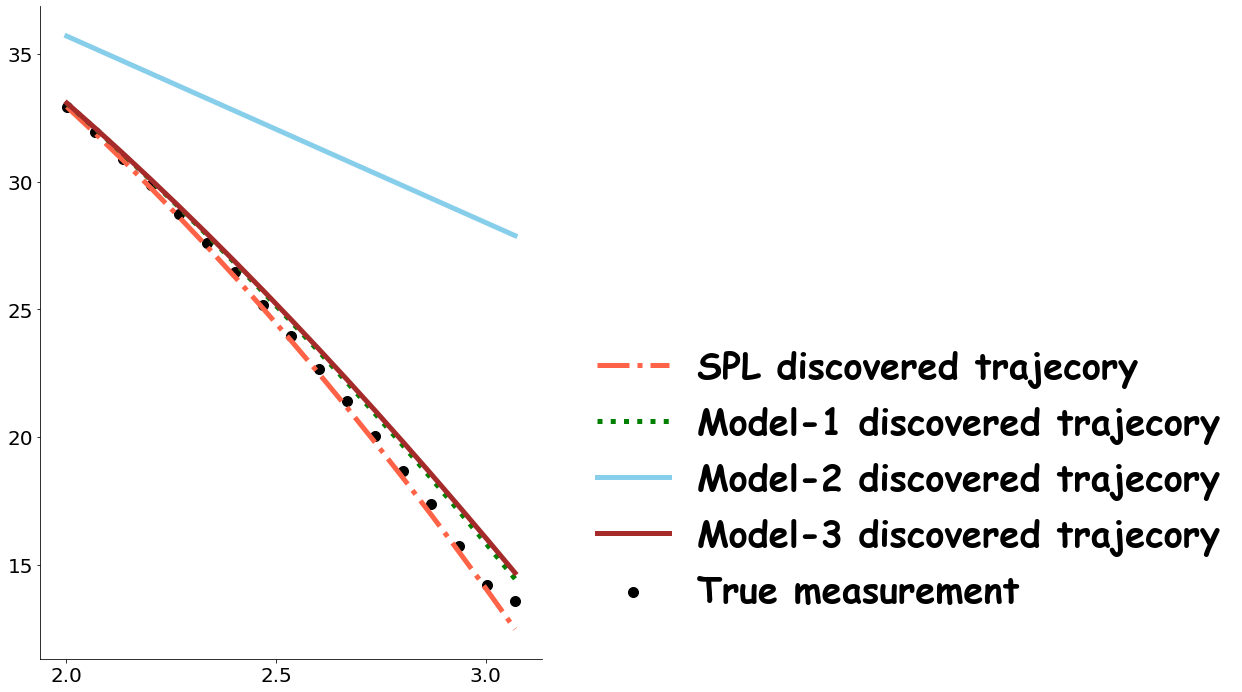

task :Bowling Ball
46.139-0.091*x-3.504*x**2-0.431*x**3
43.336-8.525*x+5.676*exp(0*x)
46.342-247.571*log(cosh(0.189*x))

test 0
Episode 2000/2000, current best reward 0.9853576760165796.
1 tests complete after 3 iterations.
best solution: -8.6317*x**2 + log(cosh(0.45891456*x))*log(cosh(x)) + 39.836845337980324*log(cosh(0.45891456*x)) + 1.15820108007977*log(cosh(x)) + 46.139077297419453
test score: 0.7079488841350327

MSE of SRL prediction 0.413
MSE of Model-1 prediction 0.33
MSE of Model-2 prediction 87.02
MSE of Model-3 prediction 3.167


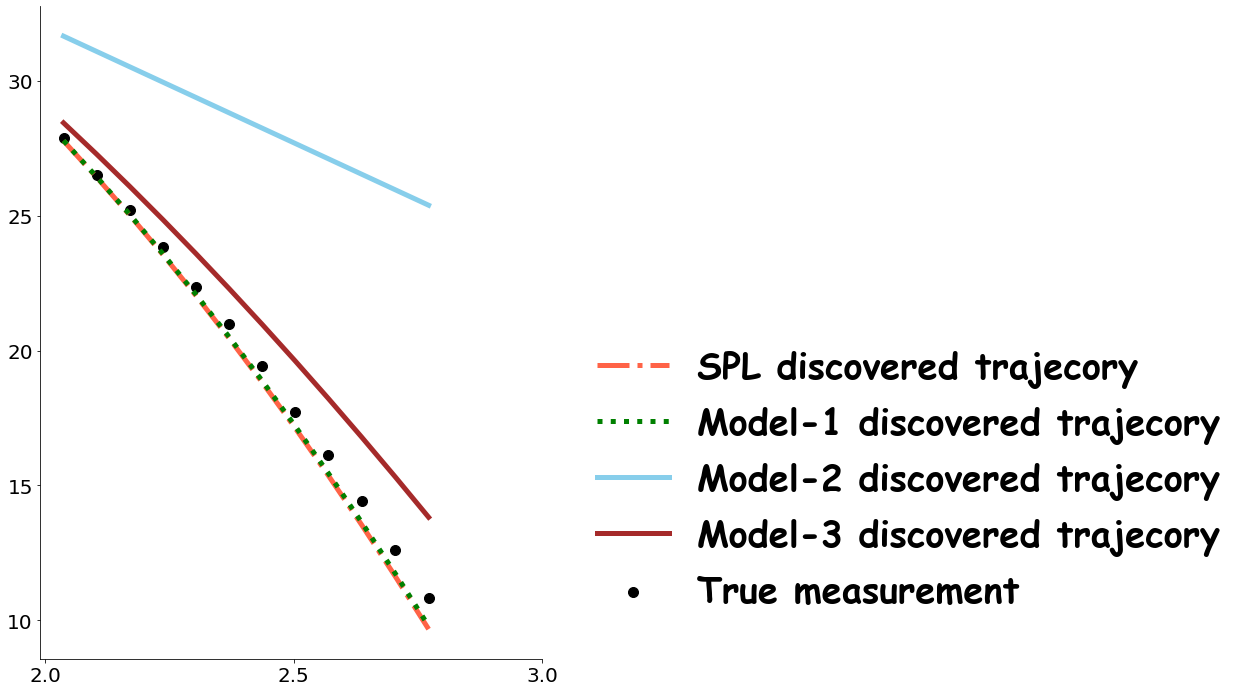

task :Golf Ball
49.413+0.532*x-5.061*x**2+0.102*x**3
46.356-8.918*x+5.964*exp(0*x)
49.585-178.47*log(cosh(0.23*x))

test 0
Episode 2000/2000, current best reward 0.9915791041649591.
1 tests complete after 3 iterations.
best solution: -4.9633*x**2 + log(cosh(x)) + 49.508714784786881
test score: 0.9911272704415892

MSE of SRL prediction 0.009
MSE of Model-1 prediction 0.214
MSE of Model-2 prediction 86.093
MSE of Model-3 prediction 1.684


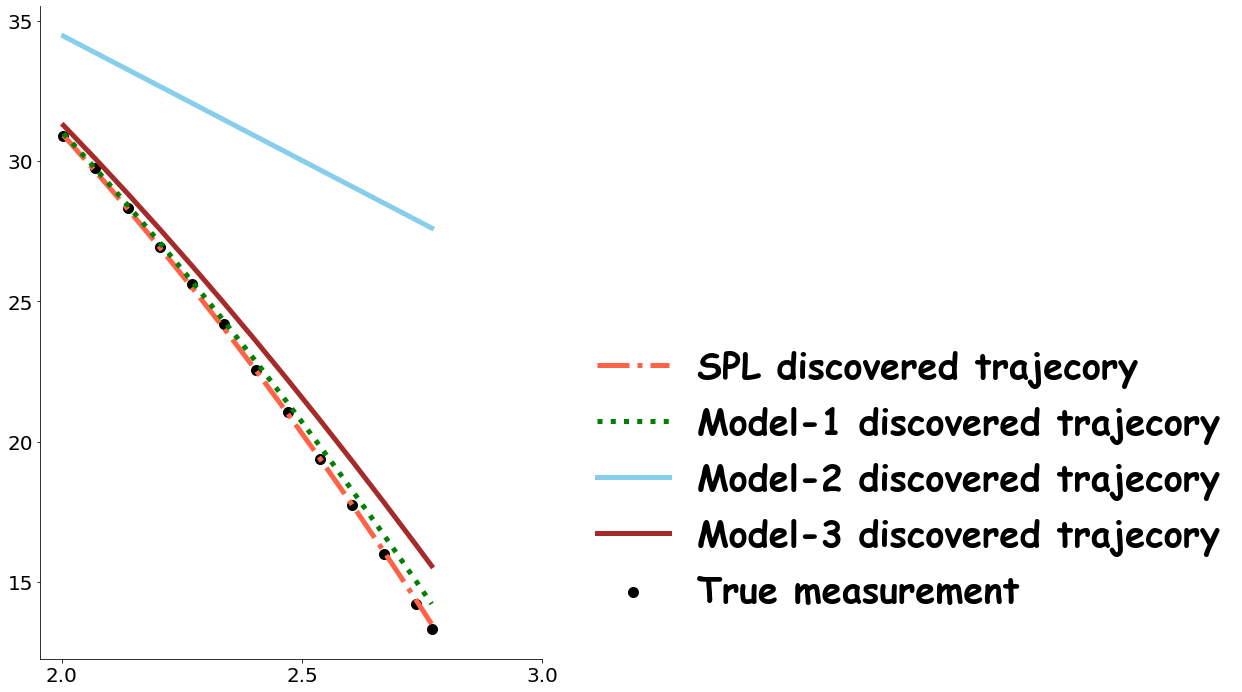

task :Tennis Ball
47.738+0.658*x-4.901*x**2+0.325*x**3
45.016-7.717*x+5.212*exp(0*x)
47.874-114.19*log(cosh(0.269*x))

test 0
Episode 2000/2000, current best reward 0.9905018275218068.
1 tests complete after 3 iterations.
best solution: -4.0574*x**2 + log(cosh(0.121*x**3)) + 47.85767152327031
test score: 0.9167610152962781

MSE of SRL prediction 0.091
MSE of Model-1 prediction 0.246
MSE of Model-2 prediction 72.278
MSE of Model-3 prediction 0.161


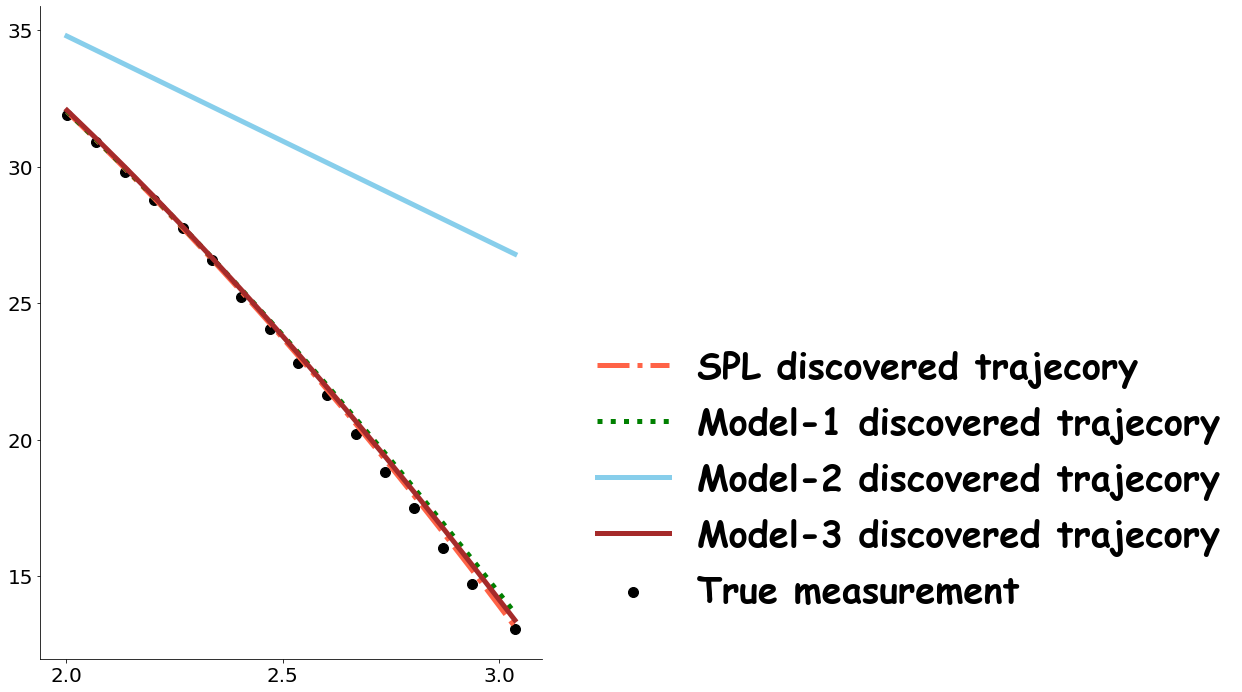

task :Whiffle Ball 1
46.969+0.574*x-4.505*x**2+0.522*x**3
44.259-6.373*x+4.689*exp(0*x)
47.062-34.083*log(cosh(0.462*x))

test 0
Episode 2000/2000, current best reward 0.9897880146277428.
1 tests complete after 3 iterations.
best solution: -11.7579 + 58.8172*exp(-0.0614*x**2)
test score: 0.3875685489291203

MSE of SRL prediction 1.58
MSE of Model-1 prediction 1.903
MSE of Model-2 prediction 65.426
MSE of Model-3 prediction 0.21


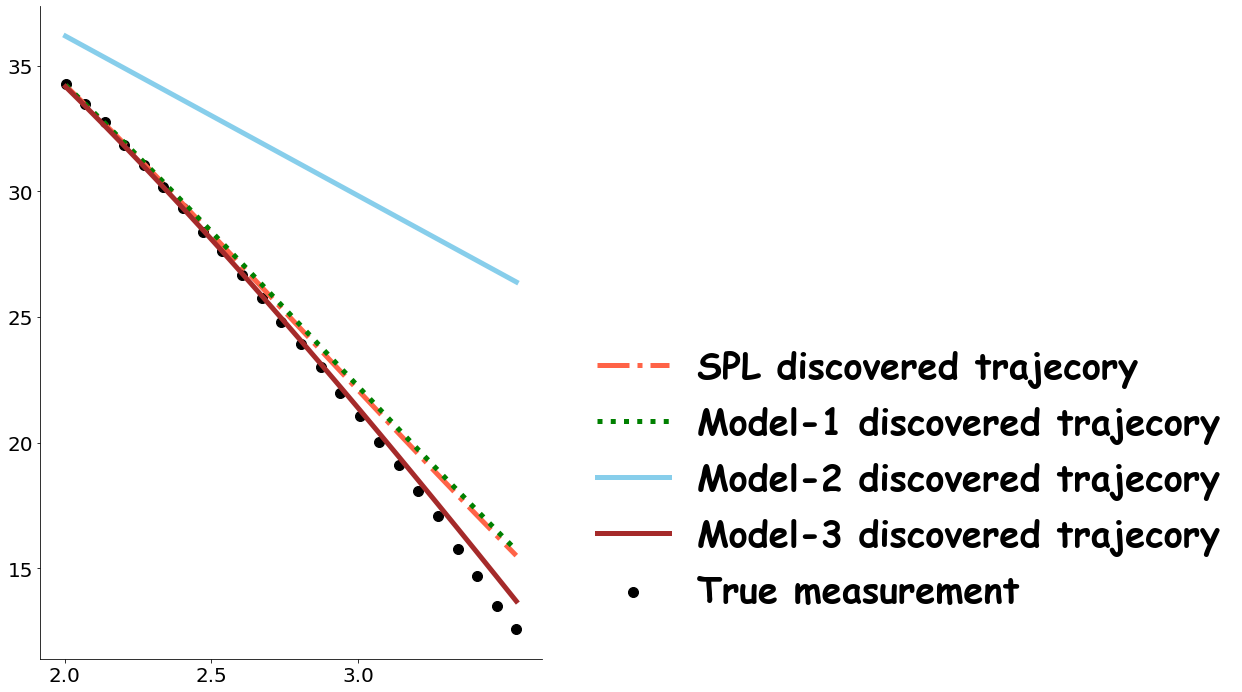

task :Whiffle Ball 2
47.215+0.296*x-4.379*x**2+0.421*x**3
44.443-6.744*x+4.813*exp(0*x)
47.255-38.29*log(cosh(0.447*x))

test 0
Episode 2000/2000, current best reward 0.9905648341080829.
1 tests complete after 3 iterations.
best solution: -3.6905*x**2 + 1.1604*log(cosh(0.21430425*x**3)) + 47.23511236846703
test score: 0.45972897026262205

MSE of SRL prediction 1.175
MSE of Model-1 prediction 0.628
MSE of Model-2 prediction 58.533
MSE of Model-3 prediction 0.966


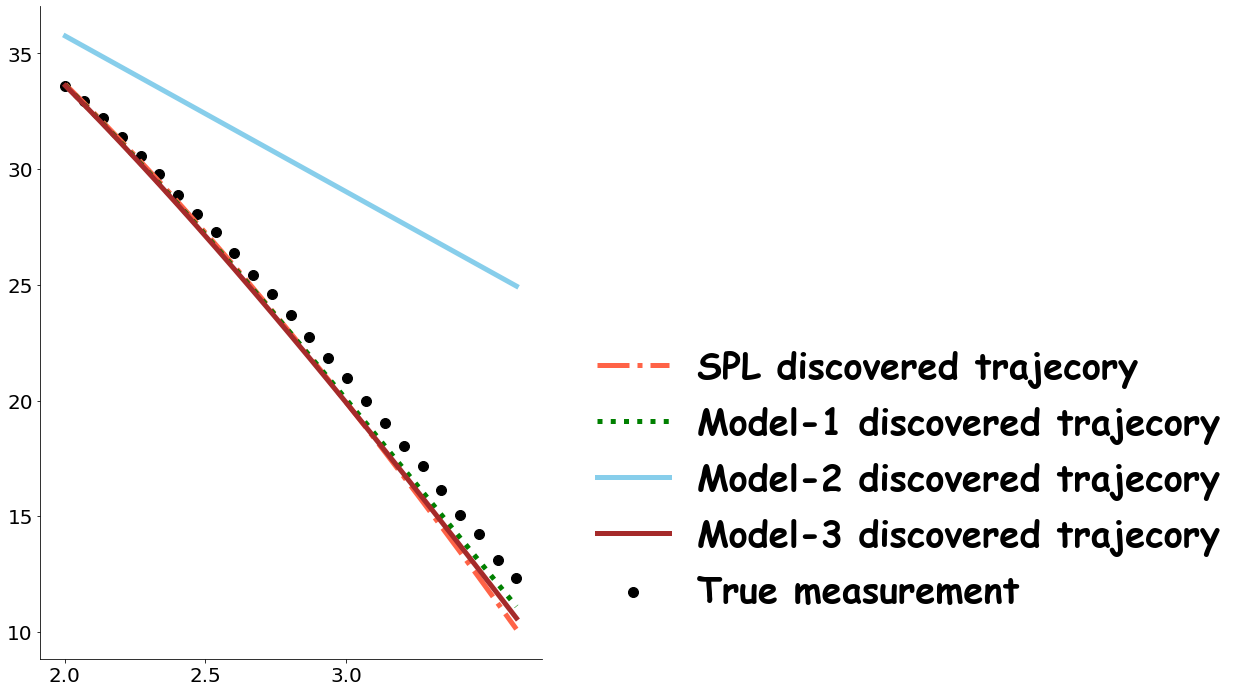

task :Yellow Whiffle Ball
48.613-0.047*x-4.936*x**2+0.826*x**3
45.443-6.789*x+4.973*exp(0*x)
48.594-12.49*log(cosh(0.86*x))

test 0
Episode 2000/2000, current best reward 0.9894446961009705.
1 tests complete after 3 iterations.
best solution: -14.5828*x**2/(log(cosh(x)) + 3.06508108168798) + 48.6092*log(cosh(x))/(log(cosh(x)) + 3.06508108168798) + 148.991139315987/(log(cosh(x)) + 3.06508108168798)
test score: 0.7003804705492613

MSE of SRL prediction 0.428
MSE of Model-1 prediction 17.341
MSE of Model-2 prediction 44.984
MSE of Model-3 prediction 2.57


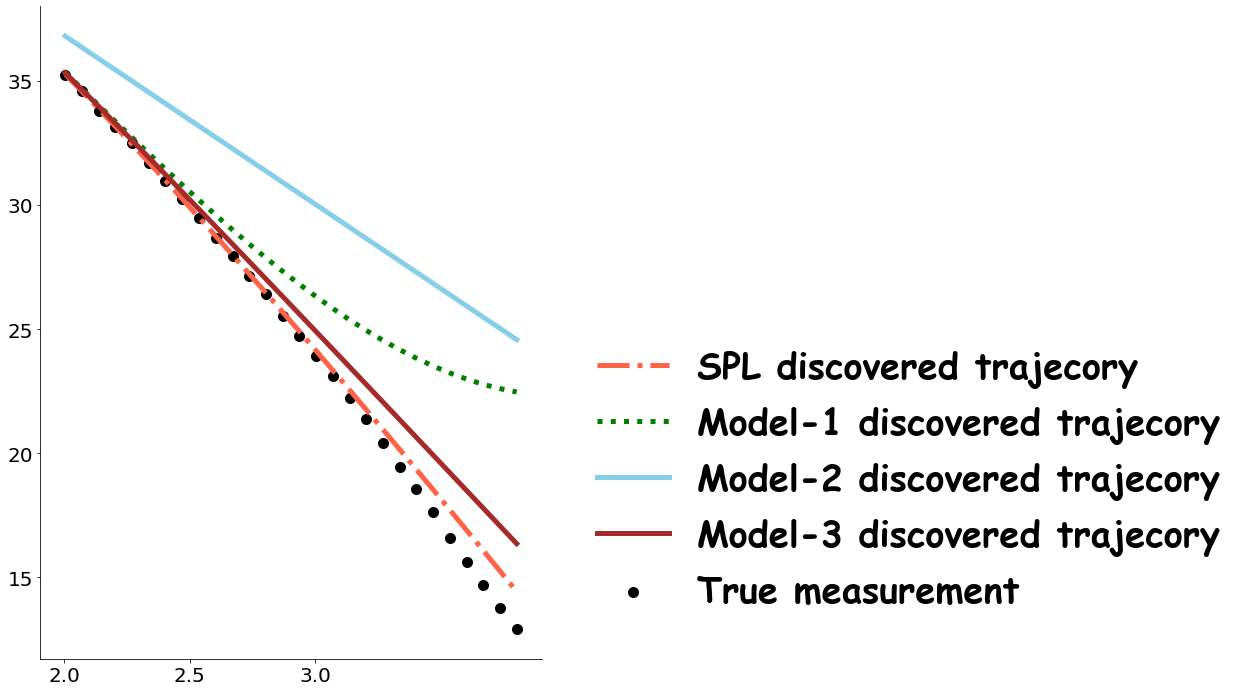

task :Orange Whiffle Ball
47.836-1.397*x-3.822*x**2+0.422*x**3
44.389-7.358*x+5.152*exp(0*x)
47.577-12.711*log(cosh(0.895*x))

test 0
Episode 2000/2000, current best reward 0.9841901397942328.
1 tests complete after 3 iterations.
best solution: -2.7695*x**2 - 2.1084*x + log(cosh(0.6703*x**3 - x**2)) + 47.91835909750627
test score: 0.05486925977170143

MSE of SRL prediction 17.225
MSE of Model-1 prediction 0.379
MSE of Model-2 prediction 36.765
MSE of Model-3 prediction 3.257


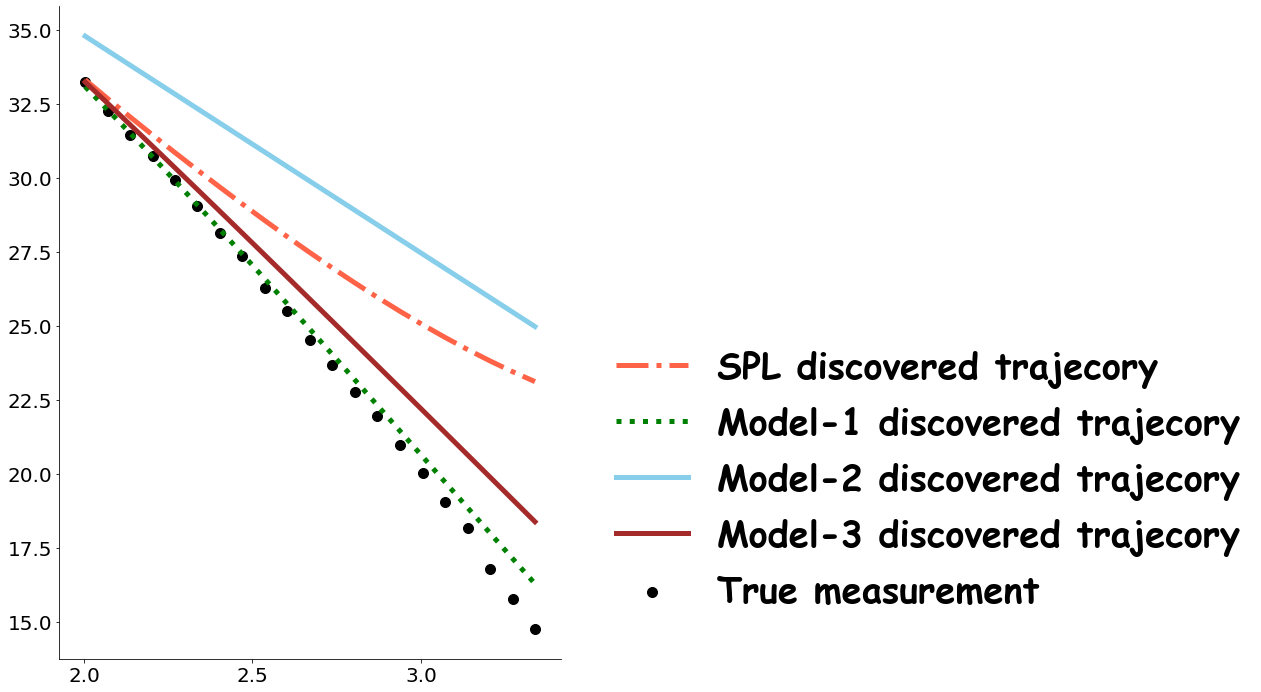

In [7]:
for task in balldrop_exp: 

    print('task :' + task)
    
    train_sample = pd.read_csv('data/' + task + '_train.csv', header=None).to_numpy().T
    test_sample = pd.read_csv('data/' + task + '_test.csv', header=None).to_numpy().T

    f_model1 = pred_with_baseline_model(baseline_models[0], train_sample, test_sample)
    f_model2 = pred_with_baseline_model(baseline_models[1], train_sample, test_sample)
    f_model3 = pred_with_baseline_model(baseline_models[2], train_sample, test_sample)
    print()
    
    all_eqs, _, _ = run_spl(task, 
                            num_run=1, 
                            max_len=20,
                            eta=1-1e-3, 
                            num_transplant=3, 
                            num_aug=0,
                            transplant_step=2000, 
                            count_success=False)
    x = test_sample[0, :]
    f_true = test_sample[1, :]
    f_srl = eval(all_eqs[0])
    
    print('MSE of SRL prediction', np.round(mean_squared_error(f_true,f_srl), 3))
    print('MSE of Model-1 prediction', np.round(mean_squared_error(f_true,f_model1), 3))
    print('MSE of Model-2 prediction', np.round(mean_squared_error(f_true,f_model2), 3))
    print('MSE of Model-3 prediction', np.round(mean_squared_error(f_true,f_model3), 3))
    
    fig = plt.figure(figsize=(9, 12))
    ax = fig.add_subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.scatter(x, f_true, s=100, color='black', label="True measurement")
    ax.plot(x, f_srl, '-.', c='tomato', lw=5, label="SPL discovered trajecory")
    ax.plot(x, f_model1, ':', c='green', lw=5, label="Model-1 discovered trajecory")
    ax.plot(x, f_model2, '-', c='skyblue', lw=5, label="Model-2 discovered trajecory")
    ax.plot(x, f_model3, '-', c='brown', lw=5, label="Model-3 discovered trajecory")
    ax.set_xticks(np.arange(2, 3.001, 0.5))
    ax.set_xticklabels(np.arange(2, 3.001, 0.5))
    plt.legend(loc=[1.08, 0.05], frameon=False, fontsize=30, prop=font)
    ax.tick_params(axis='both', which='major', labelsize=20)
    # ax.axes.xaxis.set_visible(False)
    # ax.axes.yaxis.set_visible(False)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.savefig('pictures/' + task + '.svg', bbox_inches='tight')
    plt.show()
